## Serial Crystallography Introduction

<img src="ijms-20-01094-g001.png" width="700" align="left"/>  

(c) Nam et al.  Int. J. Mol. Sci. 2019, 20(5), 1094; https://doi.org/10.3390/ijms20051094  

## Sample choice

[3WUL](https://www.rcsb.org/structure/3WUL) is a protein structure in PDB (Sugahara et al, 2016, [10.1038/nmeth.3172](https://dx.doi.org/10.1038/nmeth.3172)).
The protein is hen's egg-white lysozyme (HEWL), a small enzyme commonly used as a test case for X-ray crystallography.

<img src="3wul.pdb1-500.jpg" width="300" align="left"/>

## Simulation Demonstration

In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np

from SimEx import *

import matplotlib.colors as colors

initializing ocelot...



## Data path setup

In [2]:
data_path = './diffr_monolithic'

Clean up any data from a previous run:

In [3]:
if os.path.isdir(data_path):
    shutil.rmtree(data_path)

if os.path.isfile(data_path + '.h5'):
    os.remove(data_path + '.h5')

## Set up X-ray Beam Parameters

In [4]:
beamParam = PhotonBeamParameters(
    photon_energy = 4972.0 * electronvolt,  # photon energy in eV
    beam_diameter_fwhm=130e-9 * meter,      # focus diameter in m
    pulse_energy=45e-3 * joule,             # pulse energy in J
    photon_energy_relative_bandwidth=0.003, # relative bandwidth dE/E
    divergence=0.0 * radian,                # Beam divergence in rad
    photon_energy_spectrum_type='tophat',   # Spectrum type. Acceptable values are "tophat", "SASE", and "twocolor")
)

## Detector Setting

Define a detector with 1000 × 1000 pixels, each a 220 μm square.

In [5]:
panel = DetectorPanel(
    ranges={"fast_scan_min" : 0, "fast_scan_max" : 999,
            "slow_scan_min" : 0, "slow_scan_max" : 999},
    pixel_size=220.0e-6 * meter,
    energy_response=1.0 / electronvolt,
    distance_from_interaction_plane=0.13 * meter,
    corners={"x" : -500, "y": -500},
    saturation_adu=1.e6,
)

detector_geometry = DetectorGeometry(panels=panel)

## Diffractor Settings

Now we define the details of our sample, combined with the beam & detector definitions from above.

In [6]:
diffParam = CrystFELPhotonDiffractorParameters(
    sample='3WUL.pdb',                    # Looks up pdb file in cwd, if not found, queries from RCSB pdb mirror.
    uniform_rotation=True,                # Apply random rotation
    number_of_diffraction_patterns=2,     #
    powder=False,                         # Set to True to create a virtual powder diffraction pattern (unested)
    intensities_file=None,                # File that contains reflection intensities. If set to none, use uniform intensity distribution
    crystal_size_range=[1e-7, 1e-7],      # Range ([min,max]) in units of metres of crystal size.
    poissonize=False,                     # Set to True to add Poisson noise.
    number_of_background_photons=0,       # Change number to add uniformly distributed background photons.
    suppress_fringes=False,               # Set to True to suppress side maxima between reflection peaks.
    beam_parameters=beamParam,            # Beam parameters object from above
    detector_geometry=detector_geometry,  # External file that contains the detector geometry in CrystFEL notation.
)

Checking presence of 3WUL.pdb. Will query from PDB if not found in $PWD.
Sample path is set to 3WUL.pdb.


## Run the simulation

In [7]:
diffractor = CrystFELPhotonDiffractor(
    parameters=diffParam, output_path=data_path
)

In [8]:
# Ensure pattern_sim is on PATH
os.environ['PATH'] = "/gpfs/exfel/sw/software/crystfel-0.8.0/bin/:" + os.environ['PATH']

diffractor.backengine()
diffractor.saveH5()

Renaming diffr_out-1.h5 to diffr_out_0000001.h5.
Renaming diffr_out-2.h5 to diffr_out_0000002.h5.
Linking all patterns into /home/kluyvert/Code/crystalProject/src/controller/panoscDEMO/diffr_monolithic.h5.


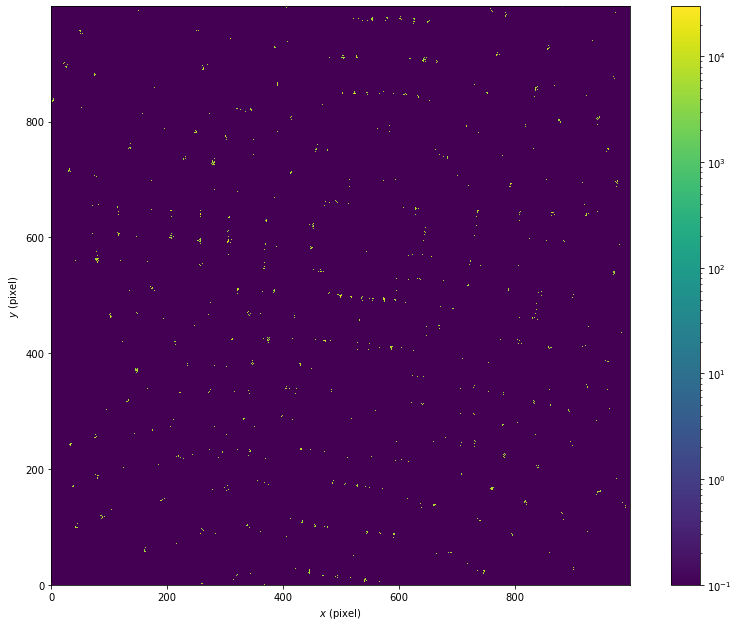

In [9]:
analyzer = DiffractionAnalysis(
    input_path=data_path,
    pattern_indices=1,
    poissonize=True,
)
analyzer.plotPattern(logscale=True)
plt.gcf().set_size_inches(12, 10)